# Project 1: SAT & ACT Analysis

## Problem Statement

The new format for the SAT was released in March 2016. With the given data on the performance of SAT/ACT in year 2017/18,  analyse and identify key factors that affect SAT participation and make recommendations on how participation rates can be improved in a state with low participation rate.

## Executive Summary
For this project,we are analysing SAT/ACT data for 2017/18 to find out key factors affecting participation rates at different states. Both SAT (Scholastic Assessment Test) and ACT are the current standardized test widely used for college admissions in the United States. The following data science process will be carried out and recommendation on how to improve the participation rate will be made with the findings.
- Defined problem statement
- Gather data
- Explore data
- Clean and preprocess data
- Create Model
- Evaluate Model
- Answer problem


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

Import libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as state
from scipy.stats import norm
sns.set_style('whitegrid')
%matplotlib inline

## 2017 Data Import and Cleaning

### Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [98]:
df_sat_2017 = pd.read_csv('../data/sat_2017.csv')
df_act_2017 = pd.read_csv('../data/act_2017.csv')

### Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [99]:
df_sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [100]:
df_act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [101]:
#get summary statistics
df_act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [102]:
#get summary statistics
df_sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [103]:
#get dataframe shape
print(df_act_2017.shape)   #ACT 2017 has one extra row ('National')
print(df_sat_2017.shape)

(52, 7)
(51, 5)


### Describe the data

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
SAT (official score range)
            
- 'Participation' : 0-100
- 'Evidence-Based Reading and Writing' : 200-800
- 'Math': 200-800
- 'Total': 400-1600
- min value for math:52 in df_act_2017 is not correct!

        
ACT (official score range)
- 'Participation': 0-100
- 'English': 1-36
- 'Math'   : 1-36
- 'Reading': 1-36
- 'Science': 1-36
- 'Composite':1-36
- min value for science:2.3 in df_act_2017 is not correct!
- value for composite column 20.2x is not correct!     

### Data cleaning (df_act_2017)

In [104]:
#1. data error 1
#Row 21: value for Science 2.3 is incorrect,  change it to 23.2
df_act_2017[df_act_2017['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [105]:
#2. data error 2
#Row 51: value for Composite column 20.2x is incorrect, change to 20.2
df_act_2017[df_act_2017['State'] == 'Wyoming']    

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [106]:
#3. fix data error 1 and check the row again
df_act_2017.loc[21,'Science'] = '23.2'
df_act_2017[df_act_2017['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


In [107]:
#4. fix data error 2 and check the row again
df_act_2017.loc[51,'Composite'] = '20.2'
df_act_2017[df_act_2017['State'] == 'Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


### Data cleaning (df_sat_2017)

In [108]:
#1. data error 1
#Row 20: value for Math 52 is incorrect,  correct value is 524
df_sat_2017[df_sat_2017['Math'] == 52.0]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [109]:
#2. fix data error 1 and check the row again
df_sat_2017.loc[20,'Math'] = 524
df_sat_2017[df_sat_2017['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


### Check and Fix incorrect data types
Display the data types of each feature. 

In [110]:
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [111]:
df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null object
Composite        52 non-null object
dtypes: float64(3), object(4)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 
- For SAT:         
    - Participation : to change from object to float

- For ACT:
    - Participation : to change from object to float
    - Science       : to change from object to float
    - Composite     : to change from object to float

In [112]:
def remove_char(df, col, char):
    df[col] = df[col].apply(lambda x: x.replace(char,''))

In [113]:
def convert_to_numeric(df, col):
    #Input: dataframe, column
    #Purpose: to convert an object column in the dataframe to a float column
    df[col] = df[col].apply(lambda x: float(x))
 

- Fix any individual values preventing other columns from being the appropriate type.

In [114]:
remove_char(df_act_2017,'Participation','%')
remove_char(df_sat_2017,'Participation','%')
convert_to_numeric(df_act_2017,'Participation')
convert_to_numeric(df_sat_2017,'Participation')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [115]:
df_act_2017['Science'] = df_act_2017['Science'].astype('float')
df_act_2017['Composite'] = df_act_2017['Composite'].astype('float')

- Display the data types again to confirm they are correct.

In [116]:
df_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [117]:
df_act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


### Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [118]:
#code
df_act_2017.rename(columns={"State": "state",
"Participation": "act_participation_2017",
"English": "act_english_2017",
"Math": "act_math_2017",
"Reading": "act_reading_2017",
"Science": "act_science_2017",
"Composite": "act_composite_2017"}, inplace=True)

In [119]:
#code
df_sat_2017.rename(columns={"State": "state",
"Participation": "sat_participation_2017",
"Evidence-Based Reading and Writing": "sat_ebrw_2017",
"Math": "sat_math_2017",
"Total": "sat_total_2017"}, inplace=True)

### Create a data dictionary

In [120]:
df_act_2017.dtypes

state                      object
act_participation_2017    float64
act_english_2017          float64
act_math_2017             float64
act_reading_2017          float64
act_science_2017          float64
act_composite_2017        float64
dtype: object

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 
|state|object|ACT|state name
|act_participation_2017|float|ACT|Participation %
|act_english_2017|float|ACT|English Score (1-36)
|act_math_2017|float|ACT|Math Score (1-36)
|act_reading_2017|float|ACT|Reading Score (1-36)
|act_science_2017|float|ACT|Science Score (1-36)
|act_composite_2017|float|ACT|Average of English/Math/Science/Reading (1-36)
|sat_participation_2017|float|SAT|Participation %
|sat_ebrw_2017|int|SAT|Evidence Based Reading and Writing Score (200-800)
|sat_math_2017|int|SAT|Math Score (200-800)
|sat_total_2017|int|SAT|Total of EBRW and Math
|
####note. The same set of columns are also used for 2018 data.

### Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [121]:
#Data for 'National' is found in df_act_2017 but not in df_sat_2017, drop this row.
df_act_2017[df_act_2017['state'] == 'National']
df_act_2017.drop(0, inplace=True)

In [122]:
df_act_2017[df_act_2017['state'] == 'National']

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017


### Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [123]:
df_2017 = pd.merge(df_act_2017, df_sat_2017, on='state', how='inner')

In [124]:
df_2017.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


### Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [125]:
df_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [126]:
df_sat_2018 = pd.read_csv('../data/sat_2018.csv')
df_act_2018 = pd.read_csv('../data/act_2018.csv')

In [127]:
df_sat_2018.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [128]:
df_act_2018.head(10)

,State,Participation,Compsite,English,Math,Reading,Science
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,17,23.2,23.7,23.1,24.5,23.4
8,District of Columbia,32,23.6,23.7,22.7,24.4,23.0
9,Florida,66,19.9,19.2,19.3,21.1,19.5


In [129]:
df_act_2018.describe()

,Compsite,English,Math,Reading,Science
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,21.460377,20.958491,21.101887,21.988679,21.320755
std,2.069591,2.403638,1.999855,2.129614,1.837992
min,17.700000,16.600000,17.800000,18.000000,17.900000
25%,20.000000,19.100000,19.400000,20.500000,20.000000
50%,20.800000,20.200000,20.600000,21.300000,20.800000
75%,23.500000,23.700000,23.100000,24.000000,23.000000
max,25.600000,26.000000,25.200000,26.100000,24.900000


In [130]:
df_sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [131]:
df_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
State            53 non-null object
Participation    53 non-null object
Compsite         53 non-null float64
English          53 non-null float64
Math             53 non-null float64
Reading          53 non-null float64
Science          53 non-null float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


In [132]:
df_sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [133]:
print(df_sat_2018.shape)
print(df_act_2018.shape)

(51, 5)
(53, 7)


### Data cleaning (df_act_2018)

In [134]:
df_act_2018[df_act_2018['State']=='National']

,State,Participation,Compsite,English,Math,Reading,Science
27,National,Not given,20.8,20.2,20.5,21.3,20.7
52,National,Not given,20.8,20.2,20.5,21.3,20.7


In [135]:
#1. Drop the row 'National'
df_act_2018.drop(52, inplace = True)
df_act_2018.drop(27, inplace = True)

In [136]:
#2. Fill in missing data for following rows
#Reference : https://ipsr.ku.edu/ksdata/ksah/education/6ed16a.pdf
#               State         Participation Composite  E      M       R       S 
#18             Louisiana     Not given      19.2     19.0  18.5     19.6    19.1
#34        North Carolina     Not given      19.1     18.0  19.3     19.5    19.2
#37              Oklahoma     Not given      19.3     18.4  18.8     20.1    19.4
#39          Pennsylvania     Not given      23.5     23.3  23.2     24.0    23.1

df_act_2018.loc[18,'Participation'] = 100
df_act_2018.loc[34,'Participation'] = 100
df_act_2018.loc[37,'Participation'] = 100
df_act_2018.loc[39,'Participation'] = 20


In [137]:
#3. fix the data type for participation column: change from object to float
remove_char(df_sat_2018,'Participation','%')
convert_to_numeric(df_sat_2018,'Participation')
convert_to_numeric(df_act_2018,'Participation')

In [138]:
#Rename columns
df_act_2018.rename(columns={"State": "state",
"Participation": "act_participation_2018",
"English": "act_english_2018",
"Math": "act_math_2018",
"Reading": "act_reading_2018",
"Science": "act_science_2018",
"Compsite": "act_composite_2018"}, inplace=True)

In [139]:
#Rename columns
df_sat_2018.rename(columns={"State": "state",
"Participation": "sat_participation_2018",
"Evidence-Based Reading and Writing": "sat_ebrw_2018",
"Math": "sat_math_2018",
"Total": "sat_total_2018"}, inplace=True)

In [140]:
#Re-arrange the columns orders to be the same as 2017 data
cols = ['state','act_participation_2018','act_english_2018','act_math_2018', 'act_reading_2018','act_science_2018','act_composite_2018']
df_act_2018 = df_act_2018[cols]


In [141]:
df_act_2018.shape

(51, 7)

In [142]:
df_sat_2018.shape

(51, 5)

### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [143]:
#Merge ACT and SAT dataframe for 2018
df_2018 = pd.merge(df_act_2018,df_sat_2018,on='state', how='inner')
#export to csv file
df_2018.to_csv('../data/combined_2018.csv')

In [144]:
df_2018.head()

,state,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018
0,Alabama,100.0,18.9,18.3,19.6,19.0,19.1,6.0,595,571,1166
1,Alaska,33.0,19.8,20.6,21.6,20.7,20.8,43.0,562,544,1106
2,Arizona,66.0,18.2,19.4,19.5,19.2,19.2,29.0,577,572,1149
3,Arkansas,100.0,19.1,18.9,19.7,19.4,19.4,5.0,592,576,1169
4,California,27.0,22.5,22.5,23.0,22.1,22.7,60.0,540,536,1076


In [145]:
df_2017.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


In [146]:
#Merge dataframe for 2017 and 2018
df_combined = pd.merge(df_2017,df_2018,on='state', how='inner')

In [147]:
df_combined.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_ebrw_2017,sat_math_2017,...,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018,sat_participation_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100.0,18.9,18.3,19.6,19.0,19.1,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33.0,19.8,20.6,21.6,20.7,20.8,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66.0,18.2,19.4,19.5,19.2,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100.0,19.1,18.9,19.7,19.4,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27.0,22.5,22.5,23.0,22.1,22.7,60.0,540,536,1076


In [148]:
#export df_combined to final.csv
df_combined.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [149]:
df_combined.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_participation_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_ebrw_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


In [150]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state                     51 non-null object
act_participation_2017    51 non-null float64
act_english_2017          51 non-null float64
act_math_2017             51 non-null float64
act_reading_2017          51 non-null float64
act_science_2017          51 non-null float64
act_composite_2017        51 non-null float64
sat_participation_2017    51 non-null float64
sat_ebrw_2017             51 non-null int64
sat_math_2017             51 non-null int64
sat_total_2017            51 non-null int64
act_participation_2018    51 non-null float64
act_english_2018          51 non-null float64
act_math_2018             51 non-null float64
act_reading_2018          51 non-null float64
act_science_2018          51 non-null float64
act_composite_2018        51 non-null float64
sat_participation_2018    51 non-null float64
sat_ebrw_2018             51 non-null int64
sat_math_2018             51 non

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [151]:
def calculate_std_dev(col):
    m = col.mean()   
    s = np.sqrt( sum( [(x-m)**2 for x in col] ) / len(col) )
    return s

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [152]:
#dictionary comprehension, skip first column 'state'
df_dict = {col : round(calculate_std_dev(df_combined[col]),6) for col in df_combined.columns[1:]}
df_dict

{'act_participation_2017': 31.824176,
 'act_english_2017': 2.330488,
 'act_math_2017': 1.962462,
 'act_reading_2017': 2.046903,
 'act_science_2017': 1.722216,
 'act_composite_2017': 2.000786,
 'sat_participation_2017': 34.929071,
 'sat_ebrw_2017': 45.21697,
 'sat_math_2017': 46.657134,
 'sat_total_2017': 91.583511,
 'act_participation_2018': 33.745195,
 'act_english_2018': 2.422254,
 'act_math_2018': 2.015707,
 'act_reading_2018': 2.145892,
 'act_science_2018': 1.851689,
 'act_composite_2018': 2.085526,
 'sat_participation_2018': 36.946619,
 'sat_ebrw_2018': 47.03461,
 'sat_math_2018': 47.301946,
 'sat_total_2018': 93.227424}

In [153]:
np.std(df_combined['act_reading_2017'])

2.0469029314842646

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The manually calculated standard deviations are the same as those from numpy std method but different from pandas describe().

### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

#### states with highest participation rates for 2017 SAT

In [154]:
df_combined[['state','sat_participation_2017']].sort_values('sat_participation_2017',
                ascending=False).head(10)

,state,sat_participation_2017
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0
19,Maine,95.0
12,Idaho,93.0
9,Florida,83.0
21,Massachusetts,76.0
39,Rhode Island,71.0


### states with highest participation rates for 2018 SAT

In [155]:
df_combined[['state','sat_participation_2018']].sort_values('sat_participation_2018',
                ascending=False).head(10)

,state,sat_participation_2018
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0
19,Maine,99.0
13,Illinois,99.0
39,Rhode Island,97.0
29,New Hampshire,96.0
8,District of Columbia,92.0


Changes in top 10 states in 2017/18: Colorado and Illinois got in for the first time with 100% and 99% respectively.

### states with lowest participation rates for 2017 SAT

In [156]:
df_combined[['state','sat_participation_2017']].sort_values('sat_participation_2017',
                ascending=True).head(10)

,state,sat_participation_2017
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0
23,Minnesota,3.0
50,Wyoming,3.0


### states with lowest participation rates for 2018 SAT

In [157]:
df_combined[['state','sat_participation_2018']].sort_values('sat_participation_2018',
                ascending=True).head(10)

,state,sat_participation_2018
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0
24,Mississippi,3.0
15,Iowa,3.0
44,Utah,4.0
23,Minnesota,4.0
18,Louisiana,4.0


States Iowa, Utah and Minnesota have up their participation by 1%.


### states with highest participation rates for 2017 ACT

In [158]:
df_combined[['state','act_participation_2017']].sort_values('act_participation_2017',
                ascending=False).head(10)

,state,act_participation_2017
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


### states with highest participation rates for 2018 ACT

In [159]:
df_combined[['state','act_participation_2018']].sort_values('act_participation_2018',
                ascending=False).head(10)

,state,act_participation_2018
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
35,Ohio,100.0
33,North Carolina,100.0
28,Nevada,100.0


State Ohio got in with 100% for the first time.

### states with lowest participation rates for 2017 ACT

In [160]:
df_combined[['state','act_participation_2017']].sort_values('act_participation_2017',
                ascending=True).head(10)

,state,act_participation_2017
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0
20,Maryland,28.0
45,Vermont,29.0
21,Massachusetts,29.0
22,Michigan,29.0
46,Virginia,29.0


### states with lowest participation rates for 2018 ACT

In [161]:
df_combined[['state','act_participation_2018']].sort_values('act_participation_2018',
                ascending=True).head(10)

,state,act_participation_2018
19,Maine,7.0
39,Rhode Island,15.0
29,New Hampshire,16.0
7,Delaware,17.0
38,Pennsylvania,20.0
22,Michigan,22.0
47,Washington,24.0
45,Vermont,24.0
46,Virginia,24.0
21,Massachusetts,25.0


% for the bottom 10 states have improved by 1% - 5%.


In [162]:
#Which states have the highest and lowest mean total/composite scores for the:
#2017 SAT?
#2018 SAT?
#2017 ACT?
#2018 ACT?

### states with highest total score for 2017 SAT

In [163]:
df_combined[['state','sat_total_2017']].sort_values('sat_total_2017',
                ascending=False).head(10)

,state,sat_total_2017
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260
34,North Dakota,1256
27,Nebraska,1253
17,Kentucky,1247
24,Mississippi,1242
44,Utah,1238


### states with highest total score for 2018 SAT

In [164]:
df_combined[['state','sat_total_2018']].sort_values('sat_total_2018',
                ascending=False).head(10)

,state,sat_total_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265
25,Missouri,1262
50,Wyoming,1257
27,Nebraska,1252
17,Kentucky,1248
41,South Dakota,1240


- Minnesota takes the highest average SAT score with 1298 but its participation rate is only 4%. Because more students in Minnesota take the ACT than they do the SAT, Minnesota's high average SAT score likely means that only the most prepared, ambitious high schoolers take the SAT. These students tend to score higher, effectively raising the state's average. Reference: https://blog.prepscholar.com/average-sat-scores-by-state-most-recent
- State South Dakota entered the top 10 with a score of 1240. State Mississippi and Utah have dropped out.

### states with lowest total score for 2017 SAT

In [165]:
df_combined[['state','sat_total_2017']].sort_values('sat_total_2017',
                ascending=True).head(10)

,state,sat_total_2017
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012
9,Florida,1017
43,Texas,1020
6,Connecticut,1041
36,Oklahoma,1047
10,Georgia,1050


### states with lowest total score for 2018 SAT

In [166]:
df_combined[['state','sat_total_2018']].sort_values('sat_total_2018',
                ascending=True).head(10)

,state,sat_total_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010
11,Hawaii,1010
22,Michigan,1011
19,Maine,1013
39,Rhode Island,1018
13,Illinois,1019


### states with highest composite score for 2017 ACT

In [167]:
df_combined[['state','act_composite_2017']].sort_values('act_composite_2017',
                ascending=False).head(10)

,state,act_composite_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2
32,New York,24.2
22,Michigan,24.1
7,Delaware,24.1
39,Rhode Island,24.0
30,New Jersey,23.9


### states with highest composite score for 2018 ACT

In [168]:
df_combined[['state','act_composite_2018']].sort_values('act_composite_2018',
                ascending=False).head(10)

,state,act_composite_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4
39,Rhode Island,24.2
45,Vermont,24.1
19,Maine,24.0
46,Virginia,23.9
5,Colorado,23.9


### states with lowest composite score for 2017 ACT

In [169]:
df_combined[['state','act_composite_2017']].sort_values('act_composite_2017',
                ascending=True).head(10)

,state,act_composite_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1
0,Alabama,19.2
3,Arkansas,19.4
36,Oklahoma,19.4
18,Louisiana,19.5
2,Arizona,19.7


### states with lowest composite score for 2018 ACT

In [170]:
df_combined[['state','act_composite_2018']].sort_values('act_composite_2018',
                ascending=True).head(10)

,state,act_composite_2018
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1
33,North Carolina,19.1
2,Arizona,19.2
18,Louisiana,19.2
36,Oklahoma,19.3
3,Arkansas,19.4


In [171]:
#Do any states with 100% participation on a given test have a rate change year-to-year?
#for SAT
condition1 = df_combined['sat_participation_2017'] == 100 
condition2 = df_combined['sat_participation_2018'] == 100
cols_to_show = ['state','sat_participation_2017','sat_participation_2018']

#check for rate change more than 0
df1 = df_combined[condition1 | condition2][cols_to_show]
df1['rate_change'] = df1['sat_participation_2018'] - df1['sat_participation_2017']
df1[df1['rate_change'] != 0]

,state,sat_participation_2017,sat_participation_2018,rate_change
5,Colorado,11.0,100.0,89.0
8,District of Columbia,100.0,92.0,-8.0
12,Idaho,93.0,100.0,7.0


- Colorado's SAT participation % increases from 11% to 100% in 2018 due to state policy change to make it mandatory. District of Columbia remains at the bottom with a 8% drop in 2018.


In [172]:
#Do any states with 100% participation on a given test have a rate change year-to-year?

#For ACT
condition1 = df_combined['act_participation_2017'] == 100 
condition2 = df_combined['act_participation_2018'] == 100
cols_to_show = ['state','act_participation_2017','act_participation_2018']
df2 = df_combined[condition1 | condition2][cols_to_show]
df2['rate_change'] = df2['act_participation_2018'] - df2['act_participation_2017']
df2[df2['rate_change'] != 0]

,state,act_participation_2017,act_participation_2018,rate_change
5,Colorado,100.0,30.0,-70.0
23,Minnesota,100.0,99.0,-1.0
27,Nebraska,84.0,100.0,16.0
35,Ohio,75.0,100.0,25.0


- Colorado's ACT participation 2018 dropped from 100% to 30%. This is likely due to the policy change to switch to SAT.
- Ohio act participation 2018 increases from 75% to 100%


In [173]:
#Do any states have >50% participation on both tests either year?
#For 2017
condition1 = df_combined['act_participation_2017'] > 50 
condition2 = df_combined['sat_participation_2017'] > 50
cols_to_show = ['state','act_participation_2017','sat_participation_2017']
df_combined[condition1 & condition2][cols_to_show]

,state,act_participation_2017,sat_participation_2017
9,Florida,73.0,83.0
10,Georgia,55.0,61.0
11,Hawaii,90.0,55.0


In [174]:
#Do any states have >50% participation on both tests either year?
#For 2018
condition1 = df_combined['act_participation_2018'] > 50 
condition2 = df_combined['sat_participation_2018'] > 50
cols_to_show = ['state','act_participation_2018','sat_participation_2018']
df_combined[condition1 & condition2][cols_to_show]

,state,act_participation_2018,sat_participation_2018
9,Florida,66.0,56.0
10,Georgia,53.0,70.0
11,Hawaii,89.0,56.0
33,North Carolina,100.0,52.0
40,South Carolina,100.0,55.0


In [175]:
##try to combine all conditions 

condition1 = df_combined['act_participation_2017'] > 50 
condition2 = df_combined['sat_participation_2017'] > 50
condition3 = df_combined['act_participation_2018'] > 50 
condition4 = df_combined['sat_participation_2018'] > 50
cols_to_show = ['state','act_participation_2017','sat_participation_2017',
                'act_participation_2018','sat_participation_2018']
df_combined[(condition1 & condition2) | (condition3 & condition4)][cols_to_show]
df_combined.any()

state                     True
act_participation_2017    True
act_english_2017          True
act_math_2017             True
act_reading_2017          True
act_science_2017          True
act_composite_2017        True
sat_participation_2017    True
sat_ebrw_2017             True
sat_math_2017             True
sat_total_2017            True
act_participation_2018    True
act_english_2018          True
act_math_2018             True
act_reading_2018          True
act_science_2018          True
act_composite_2018        True
sat_participation_2018    True
sat_ebrw_2018             True
sat_math_2018             True
sat_total_2018            True
dtype: bool

## Visualize the data

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

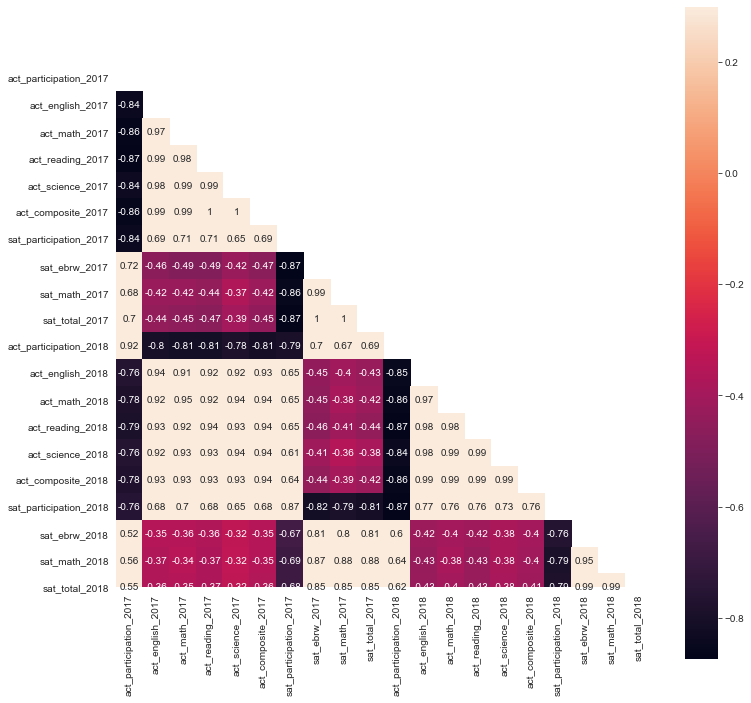

In [176]:
# Establish size of figure.
plt.figure(figsize=(12,12))

# Generate 10 variables of 200 random observations.
corr = np.corrcoef(np.random.randn(20, 200))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_combined.corr(), mask=mask, vmax=.3,square=True, annot=True)

### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [177]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column],ax=ax[i],fit=norm,bins=20,kde=True)
        #ax[i].hist(dataframe[column], bins=10) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

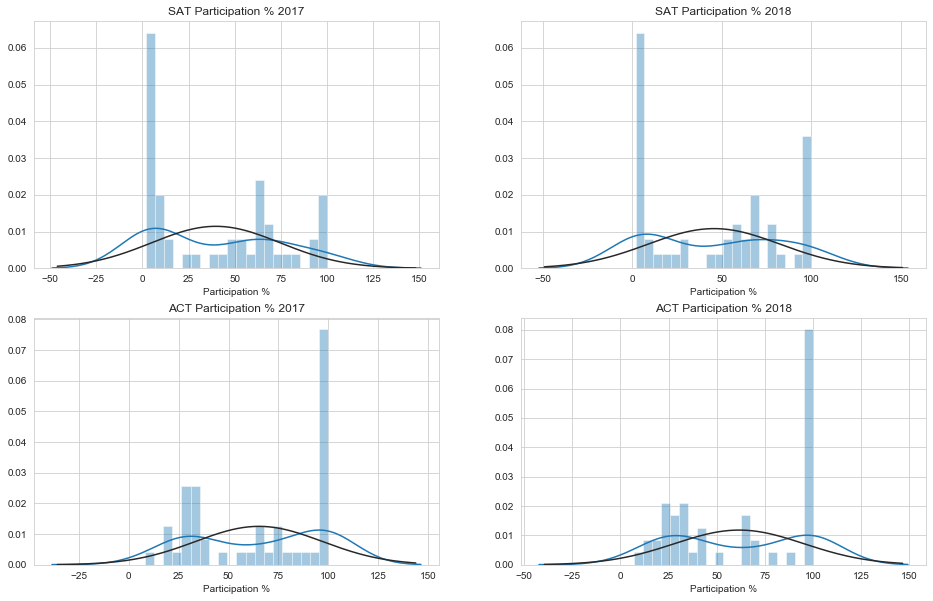

In [178]:
# Participation rates for SAT & ACT
cols = ['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']
list_titles = ['SAT Participation % 2017','SAT Participation % 2018','ACT Participation % 2017','ACT Participation % 2018']
list_xlabels = ['Participation %','Participation %','Participation %','Participation %']
subplot_histograms(df_combined, cols,list_titles, list_xlabels)

The data appear to be not normal. For ACT, there are more states with 90-100% participation. Whereas for SAT, there 
are more states with low participation between 0-10%.

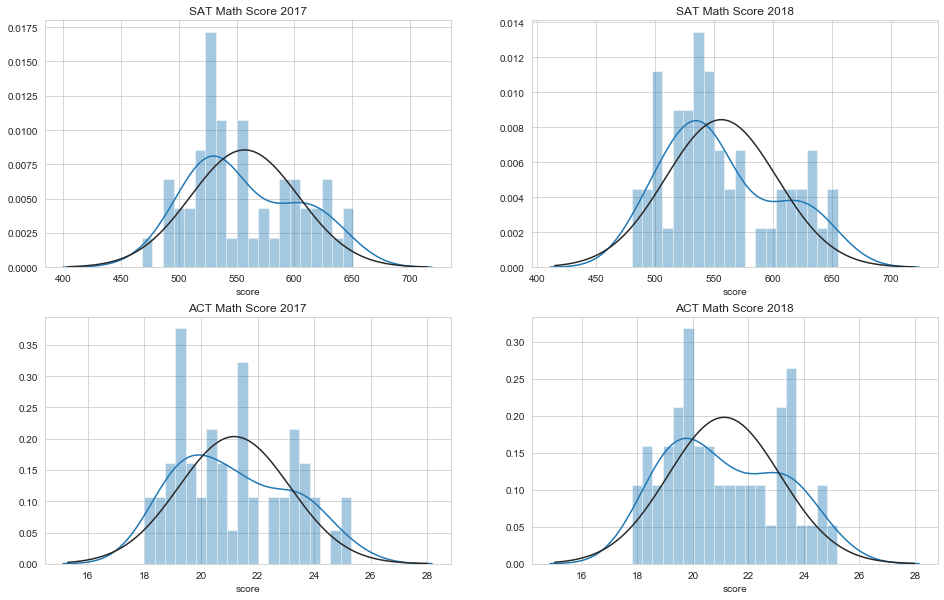

In [179]:
# Math scores for SAT & ACT
cols = ['sat_math_2017','sat_math_2018','act_math_2017','act_math_2018']
list_titles = ['SAT Math Score 2017','SAT Math Score 2018','ACT Math Score 2017','ACT Math Score 2018']
list_xlabels = ['score','score','score','score']
subplot_histograms(df_combined, cols,list_titles, list_xlabels)

The data is approximately normal.

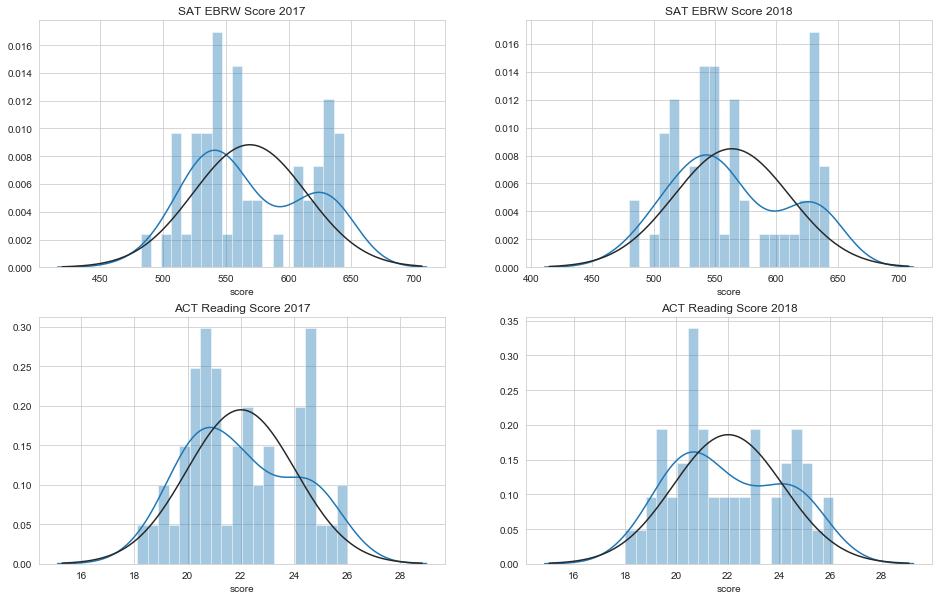

In [180]:
# Reading/verbal scores for SAT & ACT
cols = ['sat_ebrw_2017','sat_ebrw_2018','act_reading_2017','act_reading_2018']
list_titles = ['SAT EBRW Score 2017','SAT EBRW Score 2018','ACT Reading Score 2017','ACT Reading Score 2018']
list_xlabels = ['score','score','score','score']
subplot_histograms(df_combined, cols,list_titles,list_xlabels)

The data is approximately to be normal.

### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

In [181]:
def subplot_scatter(dataframe, list_of_columns_x, list_of_columns_y, list_of_titles, list_of_xlabels,list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns_x)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,6),sharex=False, sharey=False) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns_x): # Gives us an index value to get into all our lists
        sns.regplot(dataframe[column],dataframe[list_of_columns_y[i]],ax=ax[i])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        

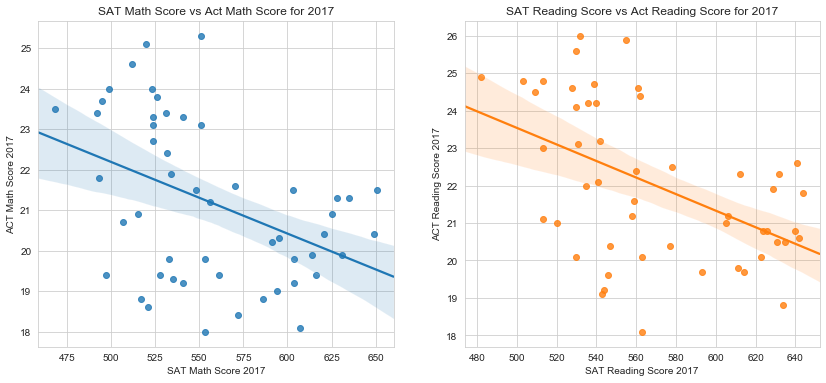

In [182]:
cols_x = ['sat_math_2017','sat_ebrw_2017']
cols_y = ['act_math_2017','act_reading_2017']
titles = ['SAT Math Score vs Act Math Score for 2017','SAT Reading Score vs Act Reading Score for 2017']
xlabels = ['SAT Math Score 2017','SAT Reading Score 2017']
ylabels = ['ACT Math Score 2017','ACT Reading Score 2017']
subplot_scatter(df_combined,cols_x,cols_y,titles,xlabels,ylabels)

The scatter plot shows a negative correlation between these 2 variables, with significant number of outliers.

                    sat_total_2017  act_composite_2017
sat_total_2017             1.00000            -0.44502
act_composite_2017        -0.44502             1.00000


Text(0, 0.5, 'ACT Composite Score 2017')

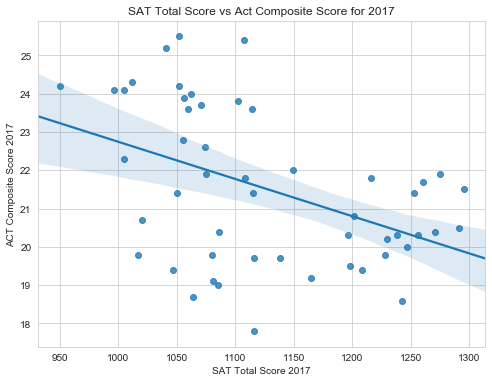

In [183]:
#SAT vs. ACT total/composite scores for 2017 - check correlation score
cols = ['sat_total_2017','act_composite_2017']
print(df_combined[cols].corr())

plt.figure(figsize=[8,6])
sns.regplot(df_combined['sat_total_2017'],df_combined['act_composite_2017'])
plt.title("SAT Total Score vs Act Composite Score for 2017")
plt.xlabel('SAT Total Score 2017')
plt.ylabel('ACT Composite Score 2017')

The scatter plot shows a negative correlation between these 2 variables, with significant number of outliers.

                sat_total_2017  sat_total_2018
sat_total_2017        1.000000        0.852727
sat_total_2018        0.852727        1.000000


Text(0, 0.5, '2018 SAT Total Score')

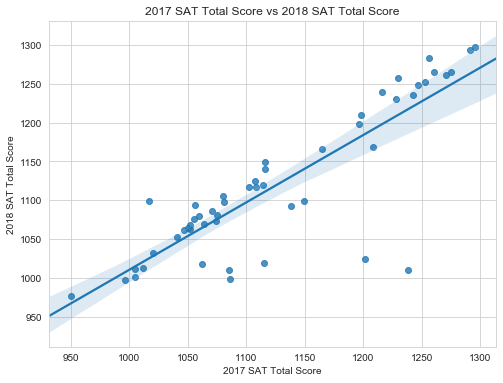

In [184]:
#Total scores for SAT 2017 vs. 2018 - check correlation score (strong positive correlation)
cols = ['sat_total_2017','sat_total_2018']
print(df_combined[cols].corr())

plt.figure(figsize=[8,6])
#sns.scatterplot(data=df_combined, x='sat_total_2017',y='sat_total_2018', s=400 )
sns.regplot(df_combined['sat_total_2017'],df_combined['sat_total_2018'])
plt.title("2017 SAT Total Score vs 2018 SAT Total Score")
plt.xlabel('2017 SAT Total Score')
plt.ylabel('2018 SAT Total Score')

The scatter plot shows a strong positive correlation between these 2 variables, with few outliers.

                    act_composite_2017  act_composite_2018
act_composite_2017            1.000000            0.939271
act_composite_2018            0.939271            1.000000


Text(0, 0.5, '2018 ACT Composite Score')

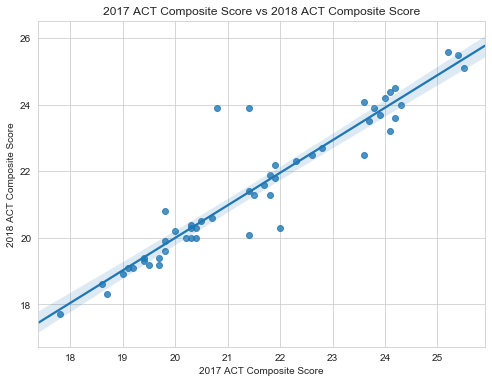

In [185]:
#Composite scores for ACT 2017 vs. 2018 - check correlation score (strong positive correlation)
cols = ['act_composite_2017','act_composite_2018']
print(df_combined[cols].corr())

plt.figure(figsize=[8,6])
#sns.scatterplot(data=df_combined, x='act_composite_2017',y='act_composite_2018',s=400 )
sns.regplot(df_combined['act_composite_2017'],df_combined['act_composite_2018'])
plt.title("2017 ACT Composite Score vs 2018 ACT Composite Score")
plt.xlabel('2017 ACT Composite Score')
plt.ylabel('2018 ACT Composite Score')

The scatter plot shows a strong correlation between these 2 variables, with few outliers.

### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0, 0.5, 'Score')

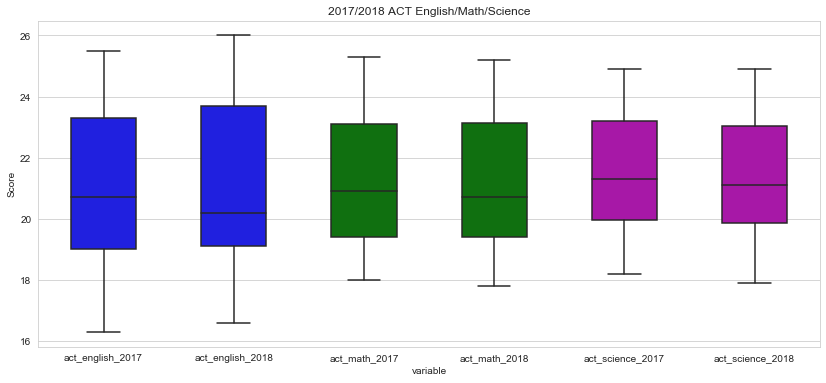

In [186]:
#boxplot 1 (2017/2018 ACT English/Math/Science)
fig, ax = plt.subplots(figsize=(14,  6))

df = df_combined[['act_english_2017','act_english_2018','act_math_2017','act_math_2018',
                     'act_science_2017','act_science_2018']]
my_pal = {'act_english_2017': 'b', 'act_english_2018': 'b',
          'act_math_2017': 'g', 'act_math_2018': 'g',
          'act_science_2017': 'm', 'act_science_2018': 'm'}

sns.boxplot(x="variable", y="value", data=pd.melt(df), palette=my_pal, width=0.5)
plt.title("2017/2018 ACT English/Math/Science")
plt.ylabel('Score')

There is a slight drop for the ACT english score and math score in 2018.

Text(0, 0.5, 'Score')

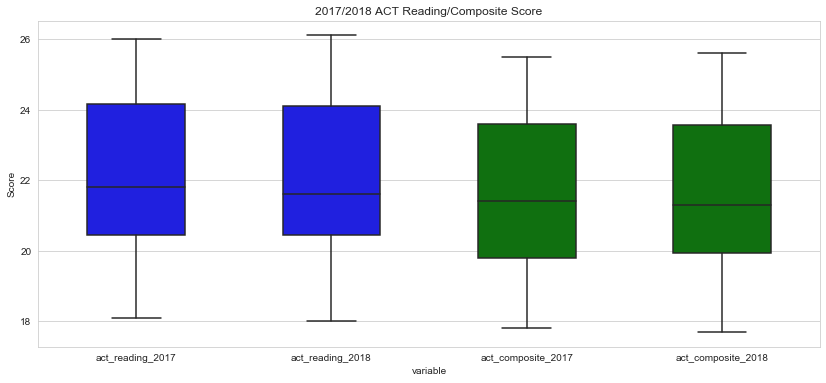

In [187]:
#boxplot 2 (2017/2018 ACT Reading/Composite Score)
fig, ax = plt.subplots(figsize=(14,  6))

df = df_combined[['act_reading_2017','act_reading_2018','act_composite_2017','act_composite_2018']]
my_pal = {'act_reading_2017': 'b', 'act_reading_2018': 'b',
          'act_composite_2017': 'g', 'act_composite_2018': 'g'}
       
sns.boxplot(x="variable", y="value", data=pd.melt(df), palette=my_pal, width=0.5)
plt.title("2017/2018 ACT Reading/Composite Score")
plt.ylabel('Score')

The scores remain similiar for both 2017/18 ACT reading score and composite score.

Text(0, 0.5, 'Score')

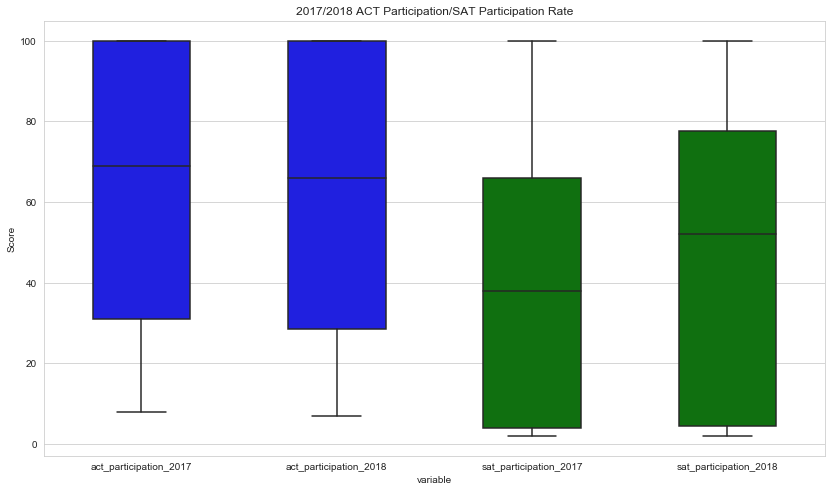

In [188]:
#boxplot 3 (2017/2018 ACT Participation / SAT Participation)
fig, ax = plt.subplots(figsize=(14,  8))

df = df_combined[['act_participation_2017','act_participation_2018',
                  'sat_participation_2017','sat_participation_2018']]
my_pal = {'act_participation_2017': 'b', 'act_participation_2018': 'b',
          'sat_participation_2017': 'g', 'sat_participation_2018': 'g'}
       
sns.boxplot(x="variable", y="value", data=pd.melt(df), palette=my_pal, width=0.5)
plt.title("2017/2018 ACT Participation/SAT Participation Rate")
plt.ylabel('Score')

There is a significant increase in the SAT participation in 2018, likely due to policy changes in some states.

Text(0, 0.5, 'Score')

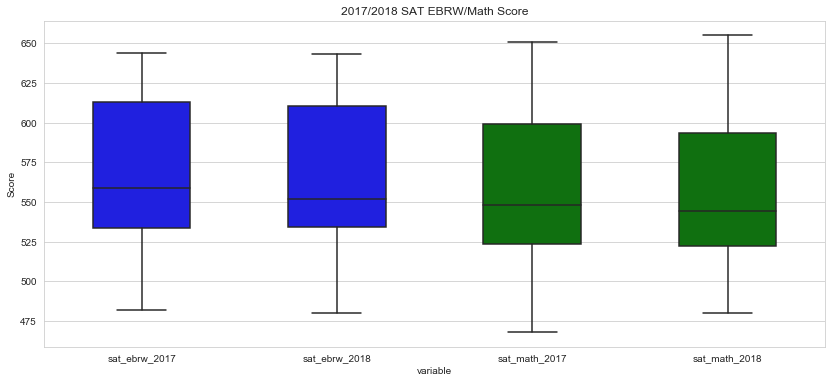

In [189]:
#boxplot 4 (2017/2018 SAT EBRW/Math/Total)
fig, ax = plt.subplots(figsize=(14,  6))

df = df_combined[['sat_ebrw_2017','sat_ebrw_2018','sat_math_2017','sat_math_2018']]

my_pal = {'sat_ebrw_2017': 'b', 'sat_ebrw_2018': 'b',
          'sat_math_2017': 'g', 'sat_math_2018': 'g'}
       
sns.boxplot(x="variable", y="value", data=pd.melt(df), palette=my_pal, width=0.5)
plt.title("2017/2018 SAT EBRW/Math Score")
plt.ylabel('Score')

There is a slight drop in the SAT Evidence Based Reading Writing and math score in 2018.

Text(0, 0.5, 'Score')

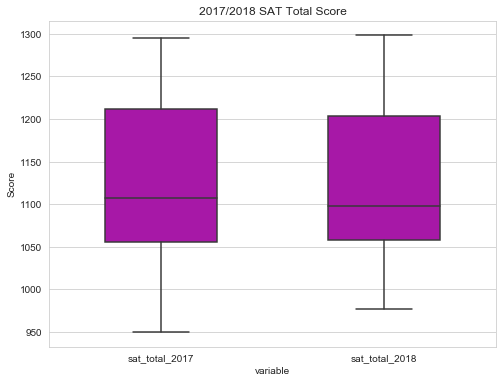

In [190]:
#boxplot 5 (2017/2018 SAT Total)
fig, ax = plt.subplots(figsize=(8,6))

df = df_combined[['sat_total_2017','sat_total_2018']]
my_pal = {'sat_total_2017':'m','sat_total_2018': 'm'}
       
sns.boxplot(x="variable", y="value", data=pd.melt(df), palette=my_pal, width=0.5)
plt.title("2017/2018 SAT Total Score")
plt.ylabel('Score')

### Additional Plots (unusual pattern)
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

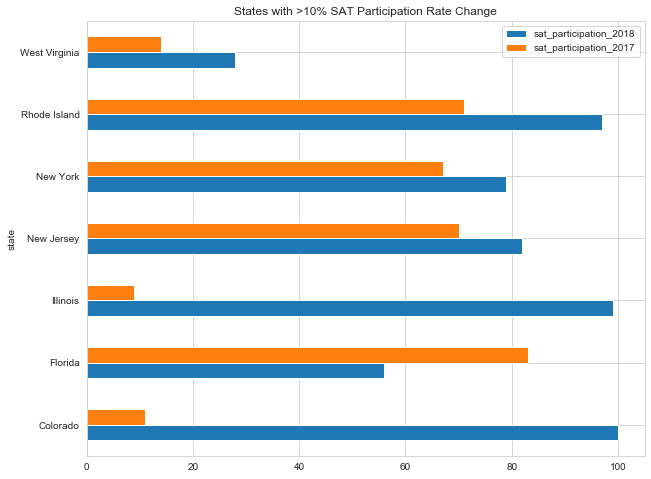

In [191]:
#additional plot 1: states with more than 10% SAT participation rate change from 2017-2018
df1 = df_combined
df1['sat_rate_change'] = df1['sat_participation_2018'] - df1['sat_participation_2017']
df1['act_rate_change'] = df1['act_participation_2018'] - df1['act_participation_2017']
df1 = df_combined[df_combined['sat_rate_change']**2 > 100.0]

df1.plot(kind='barh',x='state',y=['sat_participation_2018','sat_participation_2017'],
         title='States with >10% SAT Participation Rate Change', figsize=(10,8))

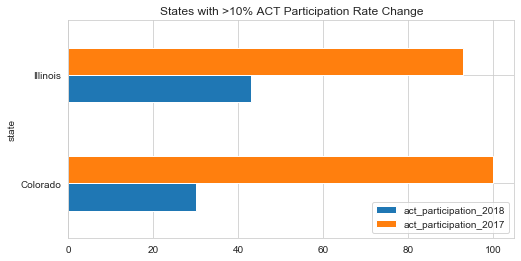

In [192]:
#additional plot 2: states with more than 10% ACT participation rate change from 2017/18
df2 = df1[df1['act_rate_change']**2 > 100.0]
df2.plot(kind='barh',x='state',y=['act_participation_2018','act_participation_2017'],
         title='States with >10% ACT Participation Rate Change', figsize=(8,4))

In [193]:
#get data for the following 3 states
#list_state = ['Illinois','Colorado','Florida','Ohio']
list_state = ['Illinois','Colorado','Rhode Island']
df_3state = df_combined[df_combined['state'].isin(list_state)]
df_3state.T

,5,13,39
state,Colorado,Illinois,Rhode Island
act_participation_2017,100,93,21
act_english_2017,20.1,21,24
act_math_2017,20.3,21.2,23.3
act_reading_2017,21.2,21.6,24.7
act_science_2017,20.9,21.3,23.4
act_composite_2017,20.8,21.4,24
sat_participation_2017,11,9,71
sat_ebrw_2017,606,559,539
sat_math_2017,595,556,524


In [194]:
#SAT Performance for the 3 states
sat_perf_cols = ['state','sat_ebrw_2017','sat_ebrw_2018','sat_math_2017','sat_math_2018','sat_total_2017','sat_total_2018']
act_perf_cols = ['state','act_reading_2017','act_reading_2018','act_math_2017','act_math_2018','act_composite_2017','act_composite_2018']
df_3state[sat_perf_cols]

,state,sat_ebrw_2017,sat_ebrw_2018,sat_math_2017,sat_math_2018,sat_total_2017,sat_total_2018
5,Colorado,606,519,595,506,1201,1025
13,Illinois,559,513,556,506,1115,1019
39,Rhode Island,539,513,524,505,1062,1018


In [195]:
#ACT performance for the 3 states
df_3state[act_perf_cols]

,state,act_reading_2017,act_reading_2018,act_math_2017,act_math_2018,act_composite_2017,act_composite_2018
5,Colorado,21.2,24.4,20.3,23.2,20.8,23.9
13,Illinois,21.6,24.2,21.2,23.4,21.4,23.9
39,Rhode Island,24.7,25.0,23.3,23.6,24.0,24.2


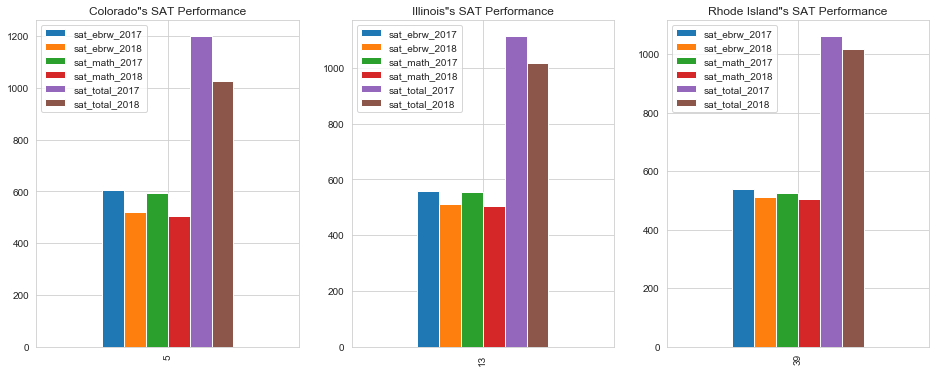

In [196]:
#plot the SAT performance for Colorado and Illinois
#set up the figure
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,6))
df_3state[df_3state['state'] == 'Colorado'][sat_perf_cols].plot(ax=axes[0], kind='bar',title='Colorado"s SAT Performance')
df_3state[df_3state['state'] == 'Illinois'][sat_perf_cols].plot(ax=axes[1], kind='bar',title='Illinois"s SAT Performance')
df_3state[df_3state['state'] == 'Rhode Island'][sat_perf_cols].plot(ax=axes[2], kind='bar',title='Rhode Island"s SAT Performance')

                        sat_participation_2018  sat_total_2018
sat_participation_2018                1.000000       -0.785926
sat_total_2018                       -0.785926        1.000000


Text(0, 0.5, '2018 Total Score')

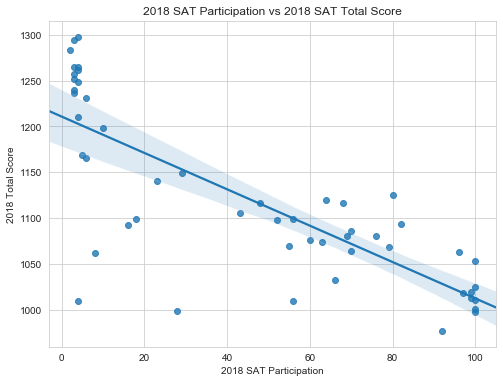

In [197]:
#SAT Participation 2017 vs SAT Total Score 2017 (strong negative correlation)
#Observations: The higher the partcipation rate, the lower will be the total score
cols = ['sat_participation_2018','sat_total_2018']
print(df_combined[cols].corr())

plt.figure(figsize=[8,6])
sns.regplot(df_combined['sat_participation_2018'],df_combined['sat_total_2018'])
plt.title("2018 SAT Participation vs 2018 SAT Total Score")
plt.xlabel('2018 SAT Participation')
plt.ylabel('2018 Total Score')


                        act_participation_2017  act_composite_2017
act_participation_2017                1.000000           -0.858134
act_composite_2017                   -0.858134            1.000000


Text(0, 0.5, '2017 ACT Composite Score')

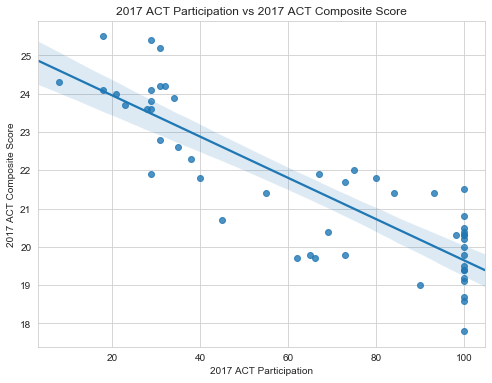

In [198]:
#ACT Participation 2017 vs ACT Composite Score 2017 (strong negative relationship)
#Top scorer in ACT comes from states with lower participation(<30%). We can infer that these are better
#students who choose to take the test as compared to those who have to take it as it is mandatory.
#similar observation for the SAT test (Top scores comes from those with <5% participation.
cols = ['act_participation_2017','act_composite_2017']
print(df_combined[cols].corr())

plt.figure(figsize=[8,6])
#sns.scatterplot(data=df_combined, x='act_participation_2017',y='act_composite_2017',s=400 )
sns.regplot(df_combined['act_participation_2017'],df_combined['act_composite_2017'])
plt.title("2017 ACT Participation vs 2017 ACT Composite Score")
plt.xlabel('2017 ACT Participation')
plt.ylabel('2017 ACT Composite Score')

# Put a legend to the right of the current axis
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## Descriptive and Inferential Statistics

### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

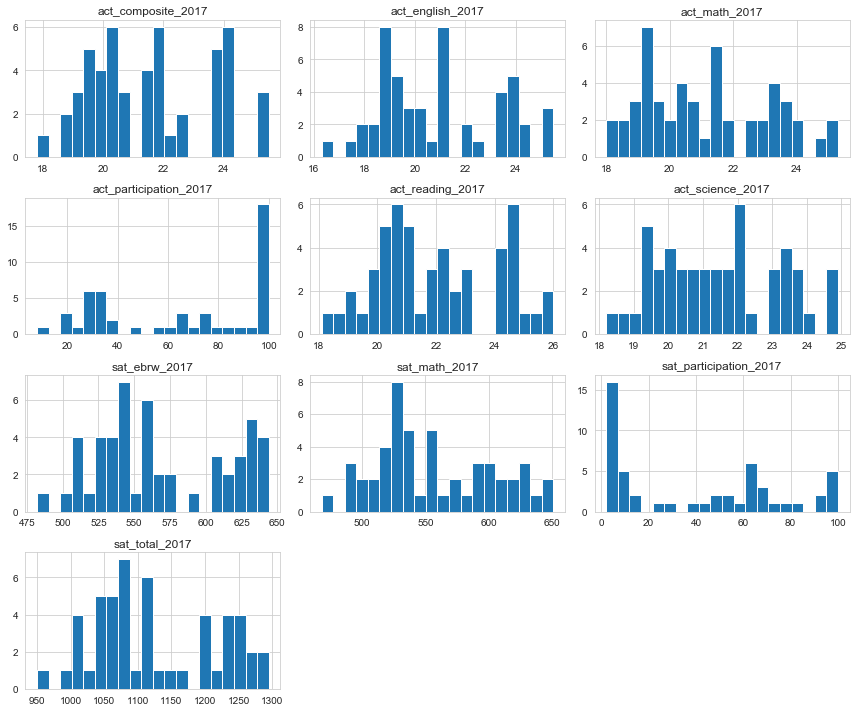

In [199]:
df_2017.hist(figsize=(12,10),bins=20)
plt.tight_layout()

Based on the histogram of each variable in 2017, we can observed that the data is not normally distributed. For example, act_participation_2017 is left-skewed while sat_participation_2017 is right-skewed.

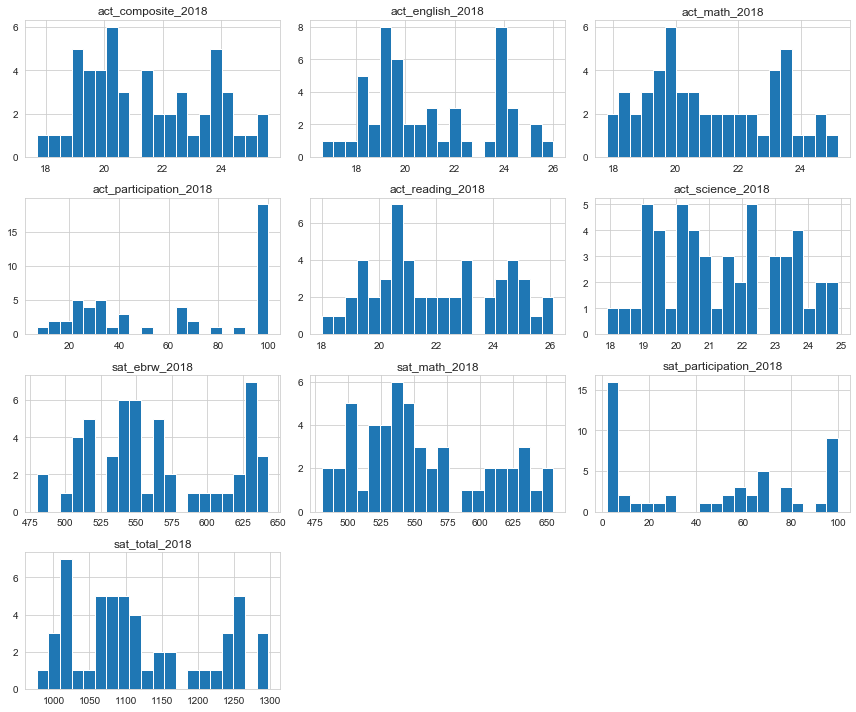

In [200]:
df_2018.hist(figsize=(12,10),bins=20)
plt.tight_layout()

The distribution of the data in 2018 is similar to those observed in 2017.

In [201]:
#function to check if the data is a normal distribution
def check_normaldist(col,data):
    # D'Agostino and Pearson's Test
    from numpy.random import seed
    from scipy.stats import normaltest
    # seed the random number generator
    seed(1)
    print('Columns: ',col)
    
    # normality test
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05

    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')  
    print('\n')

In [202]:
for col in df_combined.columns[1:]:
    check_normaldist(col,df_combined[col])

Columns:  act_participation_2017
Statistics=72.505, p=0.000
Sample does not look Gaussian (reject H0)


Columns:  act_english_2017
Statistics=4.946, p=0.084
Sample looks Gaussian (fail to reject H0)


Columns:  act_math_2017
Statistics=6.547, p=0.038
Sample does not look Gaussian (reject H0)


Columns:  act_reading_2017
Statistics=6.249, p=0.044
Sample does not look Gaussian (reject H0)


Columns:  act_science_2017
Statistics=5.501, p=0.064
Sample looks Gaussian (fail to reject H0)


Columns:  act_composite_2017
Statistics=6.557, p=0.038
Sample does not look Gaussian (reject H0)


Columns:  sat_participation_2017
Statistics=24.844, p=0.000
Sample does not look Gaussian (reject H0)


Columns:  sat_ebrw_2017
Statistics=13.818, p=0.001
Sample does not look Gaussian (reject H0)


Columns:  sat_math_2017
Statistics=5.762, p=0.056
Sample looks Gaussian (fail to reject H0)


Columns:  sat_total_2017
Statistics=9.607, p=0.008
Sample does not look Gaussian (reject H0)


Columns:  act_participat

Answers: refer output as above.

### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

Columns:  act_english_2017
Statistics=4.946, p=0.084
Sample looks Gaussian (fail to reject H0)

Columns:  act_science_2017
Statistics=5.501, p=0.064
Sample looks Gaussian (fail to reject H0)

Columns:  sat_math_2017
Statistics=5.762, p=0.056
Sample looks Gaussian (fail to reject H0)

Columns:  sat_math_2018
Statistics=4.846, p=0.089
Sample looks Gaussian (fail to reject H0)

Besides these 4, the remaining variabes are not normally distributed. As such, more sample data would be needed in order for the estimates to be accurate for further analysis.

### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: We cannot conduct statistical inference given these data as the participation rate is the aggregated % for each state, and not raw score.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No, both scores are based on different scales.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

States chosen: Colorado, Illinois, Florida

For Colorado & Illinois,Rhode Island:
- The sharp increase in SAT participation rates is primarily due to a state policy change that required all high school students to take SAT as a mandatory requirement in 2017. As a result:
- SAT total scores for Colorado has fallen from 1201 to 1025.
- SAT total scores for Illinois has fallen from 1115 to 1019
- In general, test scores tend to decline when the pool of test-takers gets larger and includes more students of varying skill levels. 

Reference:
https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

#### Key takeaways & Recommendations:
Based on the data explorations, it was evident that the increase in SAT participation was due to a state policy change of making it mandatory in states like Colorado, Illinois, Rhode Island and few others. With increase number of test takers from varying skill levels, it is normal that the overall test scores will decline.

The data also shows that participation rate has a huge impact on state average SAT / ACT scores. In any state, the top students on the SAT/ACT are those most eager to take it. The lowest participating states tend to send primarily their best students and have the highest scores.

State chosen: Iowa

The followings are some of the measures that can be considered to increase participation rate:
1. Mandating the completion of the SAT for all high school students.
2. Covering all of part of the exam fees
3. Offering the SAT during regular school hours to make student participation as convenient as possible.

In addition, schools can better prepared their students for the exam by:
4. Offering free test preparation program. eg have access to the Official SAT
Online Course
5. Provide additional academic support for students who may need it

Reference: https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf